In [93]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import datetime
import ast
import matplotlib.ticker as mtick
import urllib.request
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import json
from scipy import stats
from matplotlib.patches import Circle, Wedge, Polygon
from matplotlib.collections import PatchCollection
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore') 

# read the csv file set 1
import os
import pandas as pd
import numpy as np

os.chdir('C:\\Users\\bbhat\\Downloads\\MRP')
os.getcwd()

my_df1 = pd.read_csv('Scopus Articles - FINAL v1.csv')
print(my_df1.shape)
my_df1.head()

(1681, 53)


,Authors,Author(s) ID,from file,manual,Code,Title,smalltitle,Include/exclude,REASON for exclusion,REASON for exclusion - REAL REASON,...,CODEN,PubMed ID,Language of Original Document,Abbreviated Source Title,Document Type,Publication Stage,Open Access,Source,EID,Unnamed: 52
0,Luo Y.,7404332342;,NaN,NaN,0,A general framework of digitization risks in i...,a general framework of digitization risks in i...,Exclude,Cyber Resilience is not the main focus,Cybersecurity resilience not the main focus,...,NaN,NaN,English,J. Int. Bus. Stud.,Article,Final,"All Open Access, Bronze, Green",Scopus,2-s2.0-85106752103,NaN
1,"Helkala K.M., Rønnfeldt C.F.",15061581000;57567876400;,NaN,NaN,0,Understanding and Gaining Human Resilience Aga...,understanding and gaining human resilience aga...,Exclude,Cyber Resilience is not the main focus,Cybersecurity resilience not the main focus,...,NaN,NaN,English,Comput. Methods Appl. Sci.,Book Chapter,Final,NaN,Scopus,2-s2.0-85127840105,NaN
2,"Paik J.-Y., Jin R., Cho E.-S.",35189419700;36069555900;7202650607;,NaN,NaN,0,Malware classification using a byte-granularit...,malware classification using a byte-granularit...,Exclude,Cyber Resilience is not the main focus,Cybersecurity resilience not the main focus,...,COMIE,NaN,English,Comput Intell,Article,Article in Press,NaN,Scopus,2-s2.0-85127456347,NaN
3,"Buzhin I., Bessonov M., Mironov Y., Farkhadov ...",57208004125;57202470717;57207995420;57195741457;,NaN,NaN,0,"Integrity, Resilience and Security of 5G Trans...","integrity, resilience and security of 5g trans...",Exclude,Cyber Resilience is not the main focus,Cybersecurity resilience not the main focus,...,NaN,NaN,English,Commun. Comput. Info. Sci.,Conference Paper,Final,NaN,Scopus,2-s2.0-85126203279,NaN
4,[No author name available],[No author id available],NaN,NaN,0,7th Workshop on the Security of Industrial Con...,7th workshop on the security of industrial con...,Exclude,Full Conference Paper,Full Conference Paper,...,NaN,NaN,English,Lect. Notes Comput. Sci.,Conference Review,Final,NaN,Scopus,2-s2.0-85125257080,NaN


In [94]:
# read the csv file set 2

os.chdir('C:\\Users\\bbhat\\Downloads\\MRP\\Final Files')
os.getcwd()
my_df2 = pd.read_csv('Stage 2.2 - new papers full text with language.csv')
print(my_df2.shape)
my_df2.tail(3)


(1324, 6)


,Unnamed: 0,Code,Full text,Full text without references,blank,english lang
1321,1321,1408,Using Operating System Wrappers to Increase th...,Using Operating System Wrappers to Increase th...,No,en
1322,1322,1409,Intrusion Tolerant Systems (cid:0)\n\nPartha P...,Intrusion Tolerant Systems (cid:0)\n\nPartha P...,No,en
1323,1323,1411,Journal of Transportation Security (2021) 14:1...,Journal of Transportation Security (2021) 14:1...,No,en


In [95]:
# aggregation
my_df = my_df2.merge(my_df1, how= 'right', on='Code')
print(my_df.shape)
my_df.tail(3)

#my_df[my_df['english lang']!='en'][''].value_counts()


(1681, 58)


,Unnamed: 0,Code,Full text,Full text without references,blank,english lang,Authors,Author(s) ID,from file,manual,...,CODEN,PubMed ID,Language of Original Document,Abbreviated Source Title,Document Type,Publication Stage,Open Access,Source,EID,Unnamed: 52
1678,1321.0,1408,Using Operating System Wrappers to Increase th...,Using Operating System Wrappers to Increase th...,No,en,"Epstein J., Thomas L., Monteith E.",20433710500;56996721100;57152924200;,NaN,1408.0,...,CMSCE,NaN,English,Proc. Annu. Comput. Secur. Appl. Conf. ACSAC,Conference Paper,Final,NaN,Scopus,2-s2.0-84949511214,NaN
1679,1322.0,1409,Intrusion Tolerant Systems (cid:0)\n\nPartha P...,Intrusion Tolerant Systems (cid:0)\n\nPartha P...,No,en,Lala J.H.,6701790711;,NaN,1409.0,...,NaN,NaN,English,Proc. IEEE Pac. Rim Int. Symp. Dependable Comp...,Conference Paper,Final,NaN,Scopus,2-s2.0-84949494400,NaN
1680,1323.0,1411,Journal of Transportation Security (2021) 14:1...,Journal of Transportation Security (2021) 14:1...,No,en,"Zou B., Choobchian P., Rozenberg J.",55558490100;57222318649;36132241100;,NaN,1411.0,...,NaN,NaN,English,J. Transp. Secur.,Article,Final,NaN,Scopus,2-s2.0-85102291373,NaN


In [96]:
my_df = my_df.drop(["Author(s) ID","from file","manual","smalltitle","comments from downloads", "Issue"\
                      ,"Art. No.","Page start","Page end","Page count","Volume","DOI","Link","Authors with affiliations"\
                      ,"Funding Details","Funding Text 1","Funding Text 2","Funding Text 3","Funding Text 4"\
                      ,"Funding Text 5","Funding Text 6","Funding Text 7","Funding Text 8","Funding Text 9","Funding Text 10"\
                      ,"Correspondence Address", "Editors","ISSN","ISBN", "CODEN", "PubMed ID", "Abbreviated Source Title"\
                      ,"Publication Stage", "Open Access","Source","EID","Unnamed: 52"], axis=1)



In [97]:
my_df = my_df.replace(np.nan,'')
my_df['Cited by'] = my_df.replace('',0)
my_df['Cited by'] = my_df['Cited by'].astype('float64')

my_df.head()

,Unnamed: 0,Code,Full text,Full text without references,blank,english lang,Authors,Title,Include/exclude,REASON for exclusion,...,Year,Source title,Cited by,Affiliations,Abstract,Author Keywords,Index Keywords,Publisher,Language of Original Document,Document Type
0,,0,,,,,Luo Y.,A general framework of digitization risks in i...,Exclude,Cyber Resilience is not the main focus,...,2022,Journal of International Business Studies,0.0,"Department of Management, Miami Herbert Busine...",Digital global connectivity offers multination...,digital connectivity; digital risk; digitizati...,,Palgrave Macmillan,English,Article
1,,0,,,,,"Helkala K.M., Rønnfeldt C.F.",Understanding and Gaining Human Resilience Aga...,Exclude,Cyber Resilience is not the main focus,...,2022,Computational Methods in Applied Sciences,0.0,"Norwegian Defence University College, Cyber Ac...","Digitalization of society has, like everything...",Cybersecurity; Digitalization; Human Resilience,,Springer Science and Business Media B.V.,English,Book Chapter
2,,0,,,,,"Paik J.-Y., Jin R., Cho E.-S.",Malware classification using a byte-granularit...,Exclude,Cyber Resilience is not the main focus,...,2022,Computational Intelligence,0.0,"School of Software, Tiangong University, Tianj...",Rapidly evolving malware has become a major cy...,classification; convolutional neural networks;...,Abstracting; Classification (of information); ...,John Wiley and Sons Inc,English,Article
3,,0,,,,,"Buzhin I., Bessonov M., Mironov Y., Farkhadov ...","Integrity, Resilience and Security of 5G Trans...",Exclude,Cyber Resilience is not the main focus,...,2022,Communications in Computer and Information Sci...,0.0,Moscow Technical University of Communications ...,5G networks are being actively implemented in ...,5G networks; Information security; Network fun...,Network function virtualization; Network secur...,Springer Science and Business Media Deutschlan...,English,Conference Paper
4,,0,,,,,[No author name available],7th Workshop on the Security of Industrial Con...,Exclude,Full Conference Paper,...,2022,Lecture Notes in Computer Science (including s...,0.0,,The proceedings contain 32 papers. The special...,,,Springer Science and Business Media Deutschlan...,English,Conference Review


In [98]:
## get the data types
my_df1.info()
my_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1681 entries, 0 to 1680
Data columns (total 53 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Authors                             1681 non-null   object 
 1   Author(s) ID                        1679 non-null   object 
 2   from file                           1310 non-null   object 
 3   manual                              106 non-null    float64
 4   Code                                1681 non-null   int64  
 5   Title                               1681 non-null   object 
 6   smalltitle                          1681 non-null   object 
 7   Include/exclude                     1681 non-null   object 
 8   REASON for exclusion                429 non-null    object 
 9   REASON for exclusion - REAL REASON  418 non-null    object 
 10  comments from downloads             1421 non-null   object 
 11  Year                                1681 no

In [99]:
my_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1681 entries, 0 to 1680
Data columns (total 21 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Unnamed: 0                          1681 non-null   object 
 1   Code                                1681 non-null   int64  
 2   Full text                           1681 non-null   object 
 3   Full text without references        1681 non-null   object 
 4   blank                               1681 non-null   object 
 5   english lang                        1681 non-null   object 
 6   Authors                             1681 non-null   object 
 7   Title                               1681 non-null   object 
 8   Include/exclude                     1681 non-null   object 
 9   REASON for exclusion                1681 non-null   object 
 10  REASON for exclusion - REAL REASON  1681 non-null   object 
 11  Year                                1681 no

In [100]:
# update reasons for exclusions
my_df[my_df['blank']=="Yes"]['REASON for exclusion'] = "Pdf locked - text cannot be extracted"
my_df[my_df['english lang'] != "en"]['REASON for exclusion'] = "Not readable/different lang"
#my_df[my_df['remove manually']=="Yes"]['REASON for exclusion'] = "Pdf locked - text cannot be extracted"


to_remove = {'Code': ['0287', '0327', '0440', '0551', '0703', '0984', '1211', '1285','996'], 'Reason': ['Text Not Readable','Text Not Readable','Text Not Readable','Text Not Readable','Text Not Readable','Text Not Readable','Text Not Readable','Text Not Readable','Duplicate']}
to_remove['Index']  = my_df.index[my_df['Code'].isin(list(map(int,to_remove['Code'])))]
 
    
# drop manual records from dataframe
remove_manually = ["No"]*len(my_df)
for i,index in enumerate(to_remove['Index']):

    remove_manually[int(index)] = "Yes"
    my_df['REASON for exclusion'][index] = to_remove['Reason'][i]
    #my_df['Remove Manually'] =  np.where(my_df['Full text'].str.strip()=='', 'Yes', 'No')
    #my_df_without_references['Remove Manually'] 
    #print(my_df_without_references['Code'][int(index)])
    #print("dropped", index)
    #my_df_without_references['Full text without references'][89]
        
my_df['remove manually'] = remove_manually 
my_df['remove manually'].value_counts()
    
my_df[my_df['remove manually']=="Yes"]['REASON for exclusion'].value_counts()

#my_df[(my_df['blank']=='Yes' )]['REASON for exclusion']

Text Not Readable    8
Duplicate            1
Name: REASON for exclusion, dtype: int64

In [101]:
my_df['REASON for exclusion'].value_counts()

                                          1252
Cyber Resilience is not the main focus     133
Full Conference Paper                      125
Text Not Readable                           63
Different Language                          48
Full Book                                   22
Not Available in Ryerson Library            19
Duplicate                                   19
Name: REASON for exclusion, dtype: int64

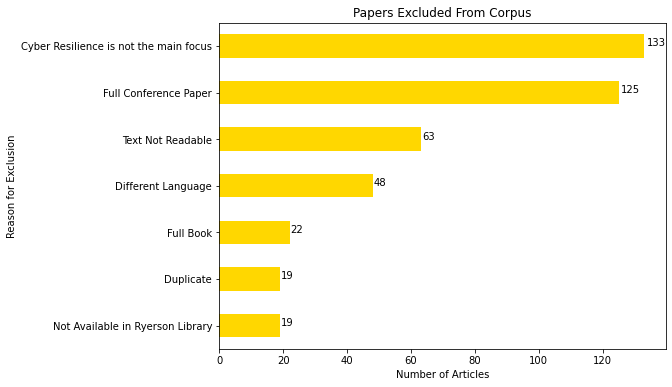

Not Available in Ryerson Library           19
Duplicate                                  19
Full Book                                  22
Different Language                         48
Text Not Readable                          63
Full Conference Paper                     125
Cyber Resilience is not the main focus    133
Name: REASON for exclusion, dtype: int64


In [102]:
## figure 1
fig, ax = plt.subplots(figsize=(8,6))
# plt.figure(figsize=(8,6))
my_df[my_df['REASON for exclusion'] != '']['REASON for exclusion'].value_counts().sort_values(ascending=True).plot(kind='barh', color='gold')
plt.xlabel('Number of Articles')
plt.ylabel('Reason for Exclusion')
plt.title('Papers Excluded From Corpus')
plt.xticks(rotation=0)
for p in ax.patches:
    ax.annotate(str(p.get_width()), ((p.get_width() * 1.005)+0.05, (p.get_y() +p.get_height()/2)))
plt.show()
print(my_df[my_df['REASON for exclusion'] != '']['REASON for exclusion'].value_counts().sort_values(ascending=True))

In [103]:
relevant_artcls = my_df[my_df['Include/exclude'] != "Exclude"]

In [104]:
relevant_artcls[relevant_artcls['Year']==1995]

,Unnamed: 0,Code,Full text,Full text without references,blank,english lang,Authors,Title,Include/exclude,REASON for exclusion,...,Source title,Cited by,Affiliations,Abstract,Author Keywords,Index Keywords,Publisher,Language of Original Document,Document Type,remove manually
1257,934.0,989,Integrating Security in GORBA Based Object Arc...,Integrating Security in GORBA Based Object Arc...,No,en,"Deng Robert H., Bhonsle Shailendra K., Wang We...",Integrating security in CORBA based object arc...,Include,,...,Proceedings of the IEEE Computer Society Sympo...,934.0,"Natl Univ of Singapore, Singapore","In this paper, we propose a distributed securi...",,Computer architecture; Computer hardware descr...,"IEEE, Piscataway, NJ, United States",English,Conference Paper,No


In [105]:
len(relevant_artcls)

1252

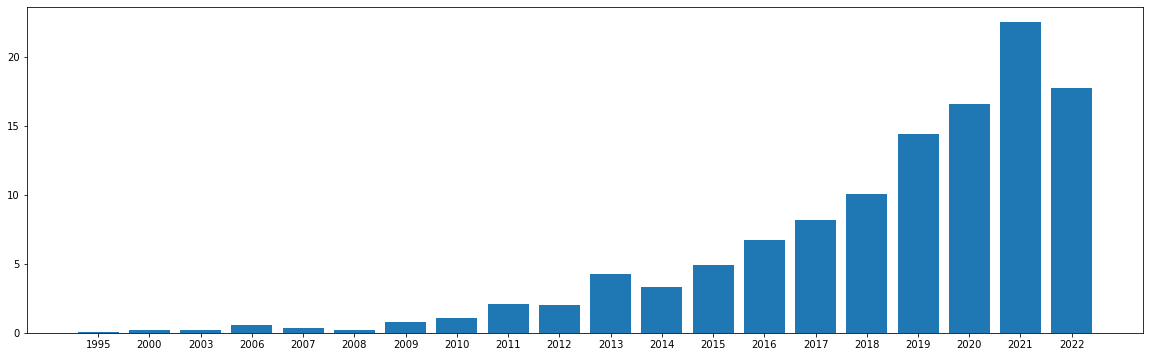

In [106]:
avg = (relevant_artcls['Year'].value_counts()/12).to_dict()

internal_marks = {2022:17.75}
fig, ax = plt.subplots(figsize=(20,6))
avg.update(internal_marks)

import matplotlib.pyplot as plt
lists = sorted(avg.items())
names, values = zip(*lists)

plt.bar(range(len(avg)), values, tick_label=names)
plt.show()

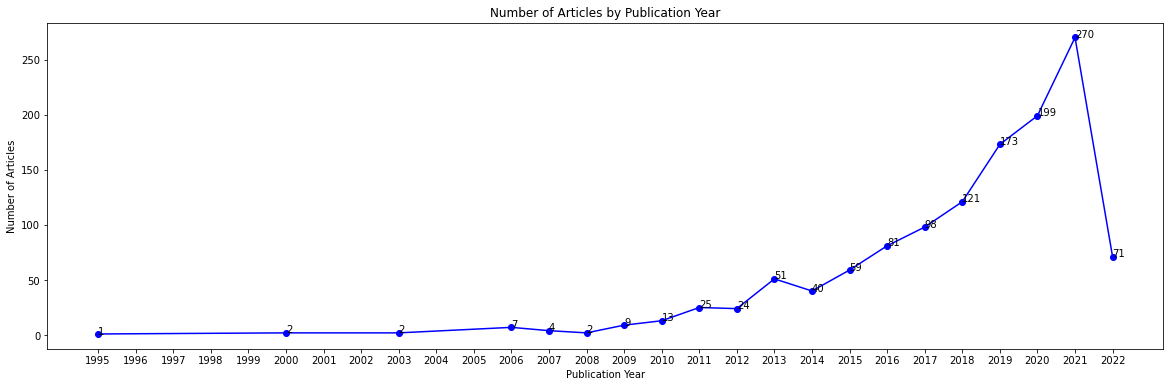

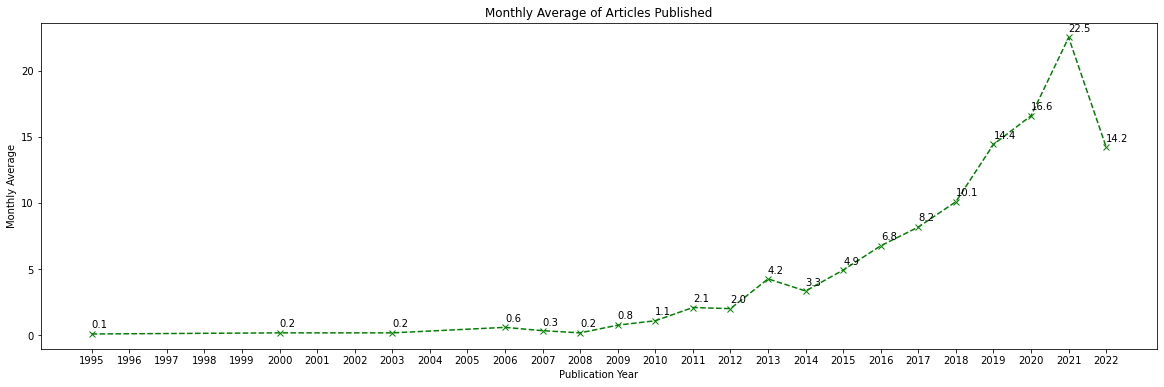

In [150]:
## figure 2
fig, ax = plt.subplots(figsize=(20,6))
# plt.figure(figsize=(8,6))
(relevant_artcls['Year'].value_counts()).sort_index().plot(kind='line', color='blue',marker='o')
plt.xlabel('Publication Year')
plt.ylabel('Number of Articles')
plt.title('Number of Articles by Publication Year')
plt.xticks(rotation=0)
plt.xticks(np.arange(min(relevant_artcls['Year']), max(relevant_artcls['Year'])+1, 1.0))
for i,j in (relevant_artcls['Year'].value_counts()).sort_index().items():
    ax.annotate(str(round(j,2)), (i, round(j,2)))
    
    
## figure 2
fig, ax = plt.subplots(figsize=(20,6))
# plt.figure(figsize=(8,6))
avg_art_per_month.sort_index().plot(kind='line', linestyle='dashed',color='green',marker='x')
plt.xlabel('Publication Year')
plt.ylabel('Monthly Average')
plt.title('Monthly Average of Articles Published')
plt.xticks(rotation=0)
plt.xticks(np.arange(min(avg_art_per_month.index), max(avg_art_per_month.index)+1, 1.0))
for i, j in (avg_art_per_month).sort_index().iteritems():
    ax.annotate(str(round(j,1)), (i, round(j,1)+0.45))
    
plt.show()

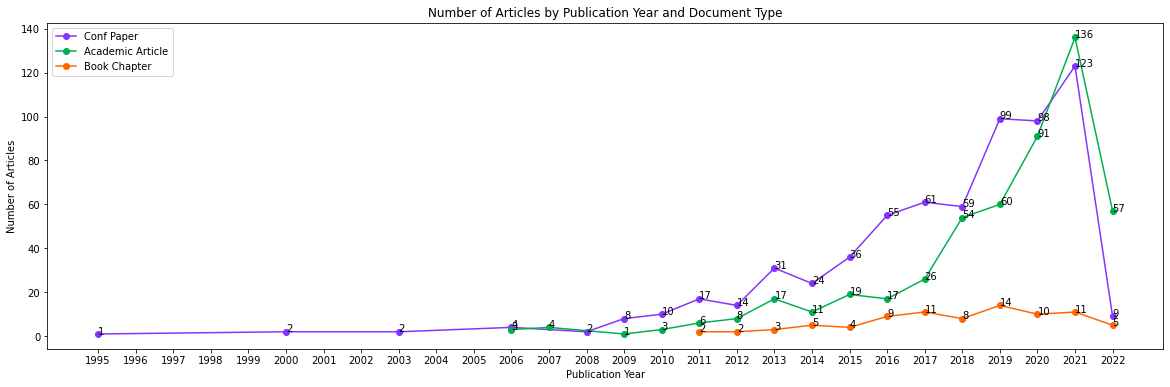

In [108]:
## figure 2
#data cleaning
relevant_artcls['Document Type']= relevant_artcls['Document Type'].replace(
np.unique(relevant_artcls[(relevant_artcls['Document Type'] != "Conference Paper")&(relevant_artcls['Document Type'] != "Book Chapter")&(relevant_artcls['Document Type'] != "Article")]['Document Type']).astype(str), 'Article') #= strArticle')

# plotting
fig, ax = plt.subplots(figsize=(20,6))

# plt.figure(figsize=(8,6))
relevant_artcls[relevant_artcls['Document Type']=="Conference Paper"]['Year'].value_counts().sort_index().plot(kind='line', color="#8633FF",marker='o',label="Conf Paper")
plt.xlabel('Publication Year')
plt.ylabel('Number of Articles')
plt.title('Number of Articles by Publication Year')
plt.xticks(rotation=0)
plt.xticks(np.arange(min(relevant_artcls[relevant_artcls['Document Type']=="Conference Paper"]['Year']), max(relevant_artcls[relevant_artcls['Document Type']=="Conference Paper"]['Year'])+1, 1.0))
for i,j in relevant_artcls[relevant_artcls['Document Type']=="Conference Paper"]['Year'].value_counts().sort_index().items():
    ax.annotate(str(j), (i, j))

    
relevant_artcls[relevant_artcls['Document Type']=="Article"]['Year'].value_counts().sort_index().plot(kind='line', color="#00B050",marker='o',label="Academic Article",ax=ax)
plt.xlabel('Publication Year')
plt.ylabel('Number of Articles')
plt.title('Number of Articles by Publication Year')
plt.xticks(rotation=0)
#plt.xticks(np.arange(min(relevant_artcls[relevant_artcls['Document Type']=="Article"]['Year']), max(relevant_artcls[relevant_artcls['Document Type']=="Article"]['Year'])+1, 1.0))
for i,j in relevant_artcls[relevant_artcls['Document Type']=="Article"]['Year'].value_counts().sort_index().items():
    ax.annotate(str(j), (i, j))

relevant_artcls[relevant_artcls['Document Type']=="Book Chapter"]['Year'].value_counts().sort_index().plot(kind='line', color="#FF6600",marker='o',label="Book Chapter",ax=ax)
plt.xlabel('Publication Year')
plt.ylabel('Number of Articles')
plt.title('Number of Articles by Publication Year and Document Type')
plt.xticks(rotation=0)
#plt.xticks(np.arange(min(relevant_artcls[relevant_artcls['Document Type']=="Article"]['Year']), max(relevant_artcls[relevant_artcls['Document Type']=="Article"]['Year'])+1, 1.0))
for i,j in relevant_artcls[relevant_artcls['Document Type']=="Book Chapter"]['Year'].value_counts().sort_index().items():
    ax.annotate(str(j), (i, j))
plt.legend(loc="topleft")
    
    

    
    
    
plt.show()

In [109]:
relevant_artcls['Document Type'].count()

1252

In [136]:
avg_art_per_month = pd.Series(relevant_artcls['Year'].value_counts()).sort_index()
avg_art_per_month[-1:] = (avg_art_per_month[-1:])/5 # year 2022 - has approximately 4 months of data
avg_art_per_month[:-1] = (avg_art_per_month[:-1])/12 #rest of the years have full data
avg_art_per_month

1995     0.083333
2000     0.166667
2003     0.166667
2006     0.583333
2007     0.333333
2008     0.166667
2009     0.750000
2010     1.083333
2011     2.083333
2012     2.000000
2013     4.250000
2014     3.333333
2015     4.916667
2016     6.750000
2017     8.166667
2018    10.083333
2019    14.416667
2020    16.583333
2021    22.500000
2022    14.200000
Name: Year, dtype: float64

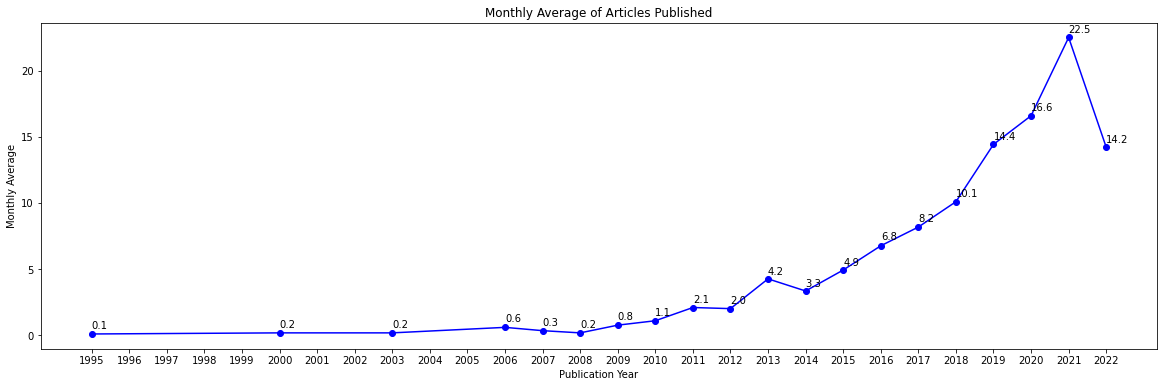

In [137]:
## figure 2
fig, ax = plt.subplots(figsize=(20,6))
# plt.figure(figsize=(8,6))
avg_art_per_month.sort_index().plot(kind='line', color='blue',marker='o')
plt.xlabel('Publication Year')
plt.ylabel('Monthly Average')
plt.title('Monthly Average of Articles Published')
plt.xticks(rotation=0)
plt.xticks(np.arange(min(avg_art_per_month.index), max(avg_art_per_month.index)+1, 1.0))
for i, j in (avg_art_per_month).sort_index().iteritems():
    ax.annotate(str(round(j,1)), (i, round(j,1)+0.4))
plt.show()

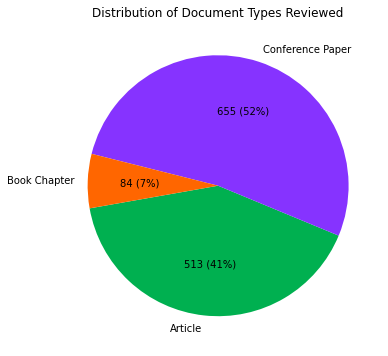

In [113]:
## figure 4
plt.figure(figsize=(8,6))
labels = ["Article","Conference Paper","Book Chapter"]
colors = [   "#00B050",  "#8633FF", "#FF6600"]


relevant_artcls['Document Type'].value_counts().reindex(labels).plot(kind='pie',subplots=True, colors=colors,autopct=lambda p: '{:.0f} ({:.0f}%)'.format(p/100*(relevant_artcls['Document Type'].count()),round(p)) , startangle=190)

plt.title('Distribution of Document Types Reviewed')
plt.ylabel('')
plt.xticks(rotation=0)
plt.show()


In [114]:
relevant_artcls['Author Keywords'].str.cat().replace("Cybersecurity","")

"Cyber threats; ;  risk assessment; Marine renewable energy; Risk managementConvergence; Converging; Cyberbiosecurity; Emerging; Resilience; Risk; Technology; Vulnerabilitydeception; honeypots; intrusion detection; resilienceCyber-physical systems; power grid; risk assessment; security; simulation; testbeds; threat modelingAIS; attacks; cybersecurity; DoS; maritime; resiliency; ship;  requirements; Energy cybersecurity; Marine renewable energy; Risk managementinfrastructure protection; reliability and testing; risk management; security; standardsCyber-physical attacks; Cyber-physical systems; Resilience; Water distribution networks; Water infrastructure systemscyberattack; cybersecurity; pandemic; resilience; simulationadaptable multi-agent systems; cyber attacks resilient missions; cyber terrain; impact dependency graphs; mission-centric cyber security Management; Enterprise Risk Management; Information Security; IT Security; strategic alignmentACPS; Artificial Immune System; CPS; Cyb

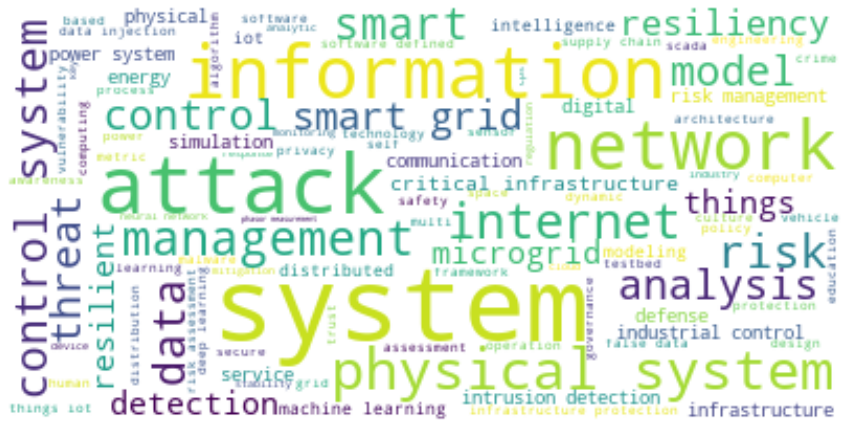

In [115]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
relevant_artcls[relevant_artcls['Author Keywords'] != 'Cybersecurity']['Author Keywords']
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white")\
.generate(
relevant_artcls[(relevant_artcls['Author Keywords'] != 'Cybersecurity') 
                & (relevant_artcls['Author Keywords'] != 'cybersecurity') 
                &(relevant_artcls['Author Keywords'] != 'security') ]['Author Keywords'].str.cat().lower().replace("cybersecurity","").replace("security","").replace("cyber security","").replace("cyber","").replace("resilience",""))
plt.figure(figsize=(15,12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [116]:
from collections import Counter
Counter(" ".join(relevant_artcls['Author Keywords']).split()).most_common(100)

[('Cyber', 382),
 ('security;', 348),
 ('Cybersecurity;', 210),
 ('systems;', 191),
 ('cyber', 160),
 ('resilience;', 142),
 ('of', 131),
 ('and', 123),
 ('security', 118),
 ('Security', 112),
 ('Resilience;', 102),
 ('Information', 98),
 ('Smart', 94),
 ('cybersecurity;', 90),
 ('Security;', 79),
 ('control', 77),
 ('control;', 74),
 ('Internet', 73),
 ('Critical', 72),
 ('system;', 70),
 ('management;', 64),
 ('Cybersecurity', 58),
 ('system', 55),
 ('Data', 55),
 ('Risk', 53),
 ('resilience', 50),
 ('learning;', 49),
 ('Cyber-physical', 48),
 ('Resilience', 46),
 ('data', 46),
 ('detection;', 45),
 ('systems', 45),
 ('Industrial', 45),
 ('information', 41),
 ('Digital', 41),
 ('management', 39),
 ('attacks;', 39),
 ('infrastructure;', 39),
 ('analysis;', 37),
 ('cyber-physical', 36),
 ('attack;', 36),
 ('Power', 36),
 ('Network', 36),
 ('risk', 35),
 ('power', 32),
 ('Things;', 32),
 ('Blockchain;', 32),
 ('Cyber-security;', 31),
 ('grid', 31),
 ('Systems;', 31),
 ('System', 31),
 (

In [117]:
my_df[my_df['Source title'] != '']['Source title'].value_counts().sort_values(ascending=True)
my_df = my_df.replace('Lecture Notes in Computer Science (including subseries Lecture Notes in Artificial Intelligence and Lecture Notes in Bioinformatics)','Lecture Notes in Computer Science')

my_df[my_df['Source title'] == 'Lecture Notes in Computer Science (including subseries Lecture Notes in Artificial Intelligence and Lecture Notes in Bioinformatics)']

,Unnamed: 0,Code,Full text,Full text without references,blank,english lang,Authors,Title,Include/exclude,REASON for exclusion,...,Source title,Cited by,Affiliations,Abstract,Author Keywords,Index Keywords,Publisher,Language of Original Document,Document Type,remove manually


In [118]:
os.chdir('C:\\Users\\bbhat\\Downloads\\MRP')
os.getcwd()

rvlt_articles = pd.read_csv('Scopus Articles - FINAL v1.csv')
print(rvlt_articles.shape)
rvlt_articles.head()
rvlt_articles = rvlt_articles[rvlt_articles['Include/exclude'] != 'Exclude']
print(rvlt_articles.shape)
rvlt_articles = rvlt_articles.replace('Lecture Notes in Computer Science (including subseries Lecture Notes in Artificial Intelligence and Lecture Notes in Bioinformatics)','Lecture Notes in Computer Science')
rvlt_articles = rvlt_articles.replace('European Conference on Information Warfare and Security, ECCWS','European Conference on Cyber Warfare and Security')
rvlt_articles[rvlt_articles['Source title'] == 'Lecture Notes in Computer Science (including subseries Lecture Notes in Artificial Intelligence and Lecture Notes in Bioinformatics)']
rvlt_articles[rvlt_articles['Source title'] == 'European Conference on Information Warfare and Security, ECCWS']


(1681, 53)
(1252, 53)


,Authors,Author(s) ID,from file,manual,Code,Title,smalltitle,Include/exclude,REASON for exclusion,REASON for exclusion - REAL REASON,...,CODEN,PubMed ID,Language of Original Document,Abbreviated Source Title,Document Type,Publication Stage,Open Access,Source,EID,Unnamed: 52


In [119]:
rvlt_articles['Cited by'].value_counts()

1.0      156
2.0      131
3.0       85
4.0       67
5.0       47
        ... 
156.0      1
261.0      1
363.0      1
142.0      1
38.0       1
Name: Cited by, Length: 75, dtype: int64

In [120]:
rvlt_articles = rvlt_articles.replace(np.nan,'')
#rvlt_articles['Cited by'] = rvlt_articles.replace('',0)
#rvlt_articles['Cited by'] #= rvlt_articles['Cited by'].astype('float64')
rvlt_articles['Cited by']= rvlt_articles['Cited by'].replace('',0)
rvlt_articles['Cited by'] #= rvlt_articles['Cited by'].astype('float64')

259       8.0
260       1.0
261       7.0
262       0.0
263      27.0
        ...  
1676    163.0
1677    235.0
1678      3.0
1679     11.0
1680      4.0
Name: Cited by, Length: 1252, dtype: float64

In [121]:
rvlt_articles[(rvlt_articles['Cited by'] !=0.0) & (rvlt_articles['Cited by'] !=1.0)]['Cited by']

259       8.0
261       7.0
263      27.0
266      33.0
267       9.0
        ...  
1676    163.0
1677    235.0
1678      3.0
1679     11.0
1680      4.0
Name: Cited by, Length: 693, dtype: float64

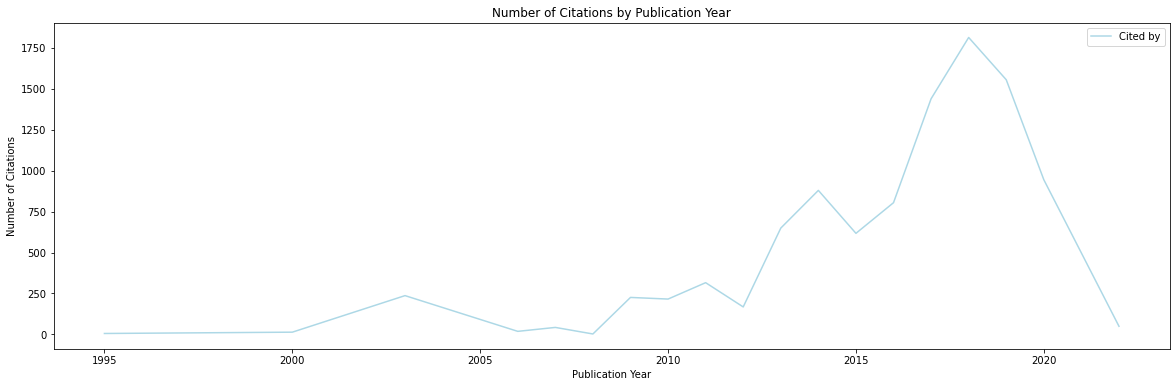

In [122]:
plt.rcParams["figure.figsize"] = (20,6)
fig, ax = plt.subplots(figsize=(20,6))
rvlt_articles[['Year','Cited by']].groupby(['Year']).sum().plot(kind='line',color='lightblue',ax=ax)
#relevant_artcls['Cited by'].plot(kind='hist', bins=5,color='blue')

plt.xlabel('Publication Year')
plt.ylabel('Number of Citations')
plt.title('Number of Citations by Publication Year')
plt.xticks(rotation=0)
rects = ax.patches
labels = ["%d" % i for i in range(len(rects))]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    if height !=0:
        plt.text(rect.get_x() + rect.get_width() / 2, height+0.01, int(height),
                ha='center', va='bottom')
  
plt.show()


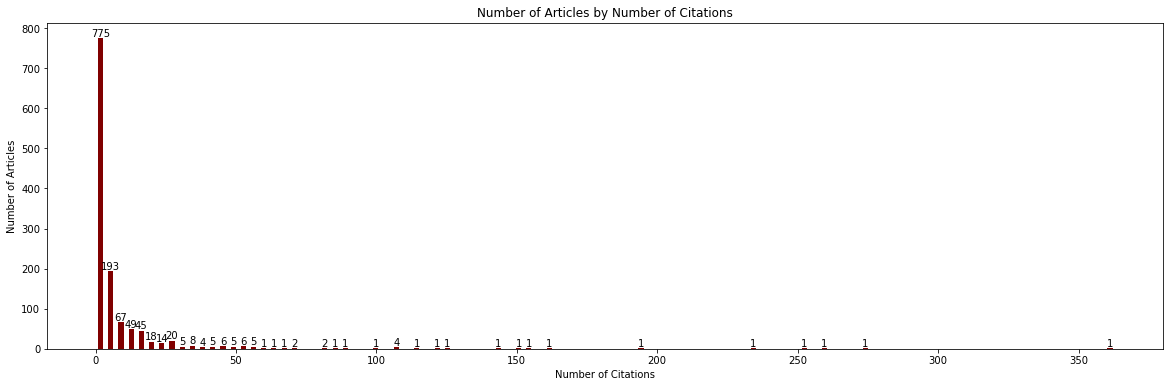

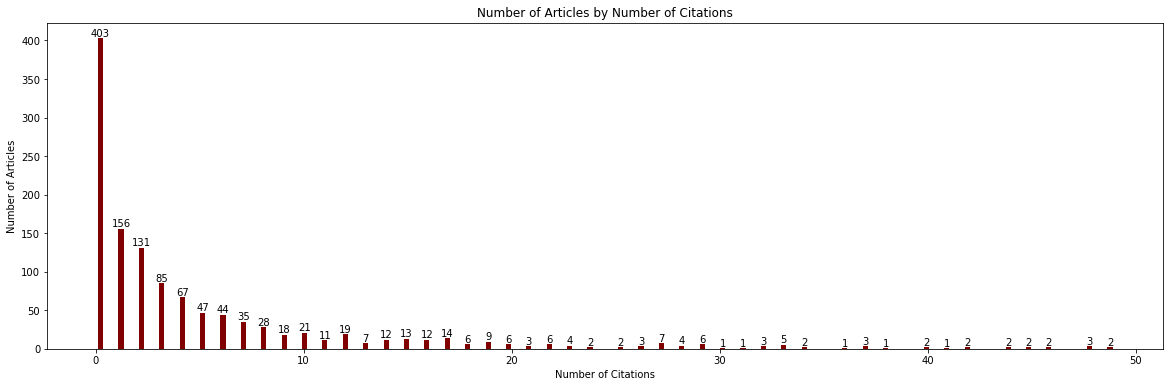

In [123]:
## figure 2
fig, ax = plt.subplots(figsize=(20,6))
# plt.figure(figsize=(8,640
plt.hist(rvlt_articles['Cited by'], bins=100,color='maroon',rwidth=0.5)
#relevant_artcls['Cited by'].plot(kind='hist', bins=5,color='blue')
plt.xlabel('Number of Citations')
plt.ylabel('Number of Articles')
plt.title('Number of Articles by Number of Citations')
plt.xticks(rotation=0)
rects = ax.patches
labels = ["%d" % i for i in range(len(rects))]
  
for rect, label in zip(rects, labels):
    height = rect.get_height()
    if height !=0:
        ax.text(rect.get_x() + rect.get_width() / 2, height+0.01, int(height),
                ha='center', va='bottom')
  
#plt.xticks(np.arange(min(relevant_artcls['Year']), max(relevant_artcls['Year'])+1, 1.0))
#for i,j in relevant_artcls['Year'].value_counts().sort_index().items():
#    ax.annotate(str(j), (i, j))
plt.show()

## figure 2
fig, ax = plt.subplots(figsize=(20,6))
# plt.figure(figsize=(8,640
plt.hist(rvlt_articles[(rvlt_articles['Cited by'] <= 50) ]['Cited by'], bins=100,color='maroon',rwidth=0.5)
#relevant_artcls['Cited by'].plot(kind='hist', bins=5,color='blue')
plt.xlabel('Number of Citations')
plt.ylabel('Number of Articles')
plt.title('Number of Articles by Number of Citations')
plt.xticks(rotation=0)
rects = ax.patches
labels = ["%d" % i for i in range(len(rects))]
  
for rect, label in zip(rects, labels):
    height = rect.get_height()
    if height !=0:
        ax.text(rect.get_x() + rect.get_width() / 2, height+0.01, int(height),
                ha='center', va='bottom')
  
#plt.xticks(np.arange(min(relevant_artcls['Year']), max(relevant_artcls['Year'])+1, 1.0))
#for i,j in relevant_artcls['Year'].value_counts().sort_index().items():
#    ax.annotate(str(j), (i, j))
plt.show()

In [124]:
authors = [i.strip() for i in rvlt_articles['Authors'].str.cat(sep=',').split(',')]
len(np.unique(authors))


print(np.unique(authors).tolist())

pd.Series(authors).value_counts().sort_values(ascending=False)#.plot(kind='barh')

['Aal A.', 'Abaas M.', 'Abbas W.', 'Abbaspour A.', 'Abbo D.', 'Abdel-Khalik H.S.', 'Abdelwahed S.', 'Abdeslam D.O.', 'Abdul-Nour G.', 'Abed-Hafez M.', 'Abeysekera M.', 'Abeywardena K.Y.', 'Abianeh A.J.', 'Abir S.M.A.A.', 'Abiri Jahromi A.', 'Abraham C.', 'Abu-Rub H.', 'Abughazleh A.', 'Abusorrah A.', 'Accorsi R.', 'Acharya S.', 'Ackley D.', 'Ackroyd F.', 'Acosta A.J.', 'Acosta J.', 'Acosta J.C.', 'Adams N.', 'Adams S.', 'Adeel A.', 'Adel A.', 'Adepu S.', 'Adhikari U.', 'Adler A.', 'Afzal H.', 'Agadakos I.', 'Aggoun A.', 'Aghaie J.', 'Aghashahi M.', 'Agrawal D.P.', 'Agrawal P.', 'Ahmad I.', 'Ahmadi A.', 'Ahmadi R.', 'Ahmadi-Assalemi G.', 'Ahmed I.', 'Ahmed N.', 'Ahmed N.N.', 'Ahmed S.', 'Ahmed U.', 'Aiken K.', 'Akesson B.', 'Akhgar B.', 'Akingeneye I.', 'Akowuah F.', 'Akpinar K.O.', 'Akram R.N.', 'Aksanli B.', 'Akyol B.', 'Al Balushi T.', 'Al Mallah R.', 'Al Shahhi E.', 'Al-Amoudi H.M.S.', 'Al-Ani A.K.', 'Al-Dulaimi A.', 'Al-Durra A.', 'Al-Ghamdi S.G.', 'Al-Hawawreh M.', 'Al-Khateeb H.'

Linkov I.        11
Ishii H.          8
Koutsoukos X.     8
Zhang P.          8
Yan J.            7
                 ..
Srivastava S.     1
Mandelbaum J.     1
Crowther K.G.     1
Combastel C.      1
Heath C.          1
Length: 3458, dtype: int64

In [125]:
author_keywords = [i.strip().lower() for i in rvlt_articles['Author Keywords'].str.cat(sep=';').split(';')]
author_keywords = pd.Series(author_keywords)
author_keywords.replace('',np.nan,inplace=True)
author_keywords.dropna( inplace=True)
author_keywords= author_keywords.replace('cyber security','cybersecurity')
author_keywords = author_keywords.replace('cyber-security','cybersecurity')
author_keywords = author_keywords.replace('resilient','resilience')
author_keywords = author_keywords.replace('resiliency','resilience')
author_keywords = author_keywords.replace('cyber-physical system','cyber physical system')
author_keywords = author_keywords.replace('cyber physical systems','cyber physical system')
author_keywords = author_keywords.replace('cyber-physical systems','cyber physical system')
len(np.unique(author_keywords))


print(np.unique(author_keywords).tolist())

pd.Series(author_keywords).value_counts().sort_values(ascending=False)#.plot(kind='barh')

['1-resilient rotation symmetric boolean function', '10 t smart homes', '1090es', '1090mhz', '10t', '2016 election', '5g', '6g', '978mhz', 'aadl', 'ac microgrids', 'access control', 'access credentials', 'access protocols', 'accident analysis', 'accident model', 'accreditation', 'acoustics', 'acps', 'acquisition policy', 'acquisitions', 'acting', 'actionable intelligence', 'active', 'active cyber defence', 'active distribution network', 'active learning', 'active monitoring', 'actuator spoofing', 'adaptable multi-agent systems', 'adaptation', 'adaptive algorithm', 'adaptive capacity', 'adaptive cruise control', 'adaptive model', 'adaptive protection', 'adaptive response', 'adaptive security', 'additive manufacturing', 'admission threshold', 'ads-b', 'ads-b protocol', 'advanced evasion techniques', 'advanced manufacturing', 'advanced persistent threat', 'advanced persistent threat (apt)', 'advanced persistent threats', 'advancement', 'adversarial attack', 'adversarial attacks', 'adversa

cybersecurity                          558
resilience                             207
security                                85
cyber resilience                        83
cyber physical system                   83
                                      ... 
security policy                          1
critical infrastructures protection      1
intelligent attacker                     1
nuclear safety                           1
huber's robust method                    1
Length: 3294, dtype: int64

In [126]:
author_keywords.to_csv('08-05 Author Keywords.txt')

In [127]:
conf_proc = [i.strip() for i in rvlt_articles[rvlt_articles['Document Type']=="Conference Paper"]['Source title'].str.cat(sep=',').split(',')]
len(np.unique(conf_proc))


print(np.unique(conf_proc).tolist())

pd.Series(conf_proc).value_counts().sort_values(ascending=False)#.plot(kind='barh')

['10th Annual International Systems Conference', '11th International Conference on Information', '11th Nuclear Plant Instrumentation', '12th IEEE International Conference on Cyber', '13th IEEE International Conference on Dependable', '14th IEEE International Conference on Ubiquitous Computing and Communications', '14th International Conference on Cyber Warfare and Security', '15th IEEE International Conference on Green Computing and Communications', '2009 3rd ACM/IEEE International Conference on Distributed Smart Cameras', '2010 5th International Conference on System of Systems Engineering', '2010 IEEE International Conference on Technologies for Homeland Security', '2011 2nd Worldwide Cybersecurity Summit', '2011 Conference on Network and Information Systems Security', '2011 IEEE Long Island Systems', '2011 IEEE/PES Power Systems Conference and Exposition', '2012 3rd Worldwide Cybersecurity Summit', '2012 IEEE International Conference on Technologies for Homeland Security', '2012 IEEE

Lecture Notes in Computer Science                                          43
ACM International Conference Proceeding Series                             27
CEUR Workshop Proceedings                                                  17
Advances in Intelligent Systems and Computing                              14
Proceedings - IEEE Military Communications Conference MILCOM               13
                                                                           ..
and IDC                                                                     1
Proceedings - 2018 IEEE International Conference on Industrial Internet     1
Proceedings of the 12th International Symposium on Open Collaboration       1
AMCIS 2015                                                                  1
2012 IEEE PES Innovative Smart Grid Technologies                            1
Length: 695, dtype: int64

In [128]:
journals = [i.strip() for i in rvlt_articles[rvlt_articles['Document Type']=="Article"]['Source title'].str.cat(sep=',').split(',')]
len(np.unique(journals))


print(np.unique(journals).tolist())

pd.Series(journals).value_counts().sort_values(ascending=False)#.plot(kind='barh')

['ACM Computing Surveys', 'AI and Society', 'AIChE Journal', 'Accident Analysis and Prevention', 'Acta Astronautica', 'Acta Informatica Medica', 'Advances in Electrical and Electronic Engineering', 'Advances in Radiation Oncology', 'Alexandria Engineering Journal', 'Annals of Operations Research', 'Annual Reviews in Control', 'Applied Computing and Informatics', 'Applied Energy', 'Applied Sciences (Switzerland)', 'Australian Journal of International Affairs', 'Automatic Control and Computer Sciences', 'Automation and Electrical Systems', 'Automation and Systems', 'Autonomous Robots', 'BMJ (Online)', 'Big Data and Cognitive Computing', 'Biosecurity and Bioterrorism', 'Business Horizons', 'Business Information Review', 'CIRP Journal of Manufacturing Science and Technology', 'Canadian Public Administration', 'Chemical Engineering (United States)', 'China Communications', 'Chinese Journal of Aeronautics', 'Cluster Computing', 'Cognition', 'Communication and Ethics in Society', 'Communicati

IEEE Transactions on Smart Grid                                                 22
IEEE Access                                                                     19
Electronics (Switzerland)                                                       10
Computers and Security                                                           9
Journal of business continuity & emergency planning                              9
                                                                                ..
International Journal of Advanced Trends in Computer Science and Engineering     1
IEEE Transactions on Parallel and Distributed Systems                            1
IFLA Journal                                                                     1
Crime                                                                            1
Innovations in Systems and Software Engineering                                  1
Length: 272, dtype: int64

In [129]:
import regex as re

publishers = [i.strip() for i in rvlt_articles['Publisher'].str.cat(sep=';').split(';')]
publishers = pd.Series(publishers)
len(np.unique(publishers))
publishers.replace('',np.nan,inplace=True)
publishers.dropna( inplace=True)
publishers= publishers.replace('Academic Conferences Limited','Academic Conferences and Publishing International Limited')
publishers= publishers.replace('American Institute of Aeronautics and Astronautics Inc.','American Institute of Aeronautics and Astronautics Inc, AIAA' )
publishers= publishers.replace('CRC Press/Balkema','CRC Press')
publishers= publishers.replace('MDPI AG','MDPI')
publishers= publishers.replace('Elsevier B.V.','Elsevier')

replacement = {
    " Inc": "",
    " Inc.": "",
    " Ltd": "",
    " Ltd.": "",
    " Limited": "",
    ",":""
    
}

publishers = publishers.replace(replacement, regex=True)


print(np.unique(publishers).tolist())

pd.Series(publishers).value_counts().sort_values(ascending=False)#.plot(kind='barh')

['ASTM International', 'Academic Conferences and Publishing International', 'Academic Press', 'Academic Publishing House Researcher', 'Academy of Business and Retail Management Research', 'Access Intelligence', 'American Institute of Aeronautics and Astronautics AIAA', 'American Nuclear Society', 'American Physical Society', 'American Scientific Publishers', 'American Society for Engineering Education', 'American Society for Engineering Management', 'American Society of Civil Engineers (ASCE)', 'American Society of Mechanical Engineers (ASME)', 'American Statistical Association', 'Americas Conference on Information Systems', 'Asian Network for Scientific Information', 'Association for Computing Machinery', 'Association for Information Systems', 'Avicena Publishing', 'BMJ Publishing Group', 'Bellwether Publishing.', 'Blackwell Publishing', 'Blackwell Publishing.', 'Blue Eyes Intelligence Engineering and Sciences Publication', 'Brno University of Technology', 'CEUR-WS', 'CRC Press', 'Cam

Institute of Electrical and Electronics Engineers.                                     387
Elsevier                                                                               109
IEEE Computer Society                                                                   63
Springer Verlag                                                                         50
Springer Science and Business Media Deutschland GmbH                                    48
                                                                                      ... 
IEEE Piscataway NJ United States                                                         1
UIKTEN - Association for Information Communication Technology Education and Science      1
USENIX Association                                                                       1
SAGE Publications.                                                                       1
American Physical Society                                                                1

In [130]:
pd.Series(conf_proc).value_counts().sort_values(ascending=True)[-10:]

Communications in Computer and Information Science               9
Proceedings                                                     10
IET Conference Publications                                     11
European Conference on Cyber Warfare and Security               12
IEEE Power and Energy Society General Meeting                   12
Proceedings - IEEE Military Communications Conference MILCOM    13
Advances in Intelligent Systems and Computing                   14
CEUR Workshop Proceedings                                       17
ACM International Conference Proceeding Series                  27
Lecture Notes in Computer Science                               43
dtype: int64

In [135]:
pd.Series(journals).value_counts().sort_values(ascending=True)[-6:]

IEEE Transactions on Industrial Informatics             8
Journal of business continuity & emergency planning     9
Computers and Security                                  9
Electronics (Switzerland)                              10
IEEE Access                                            19
IEEE Transactions on Smart Grid                        22
dtype: int64

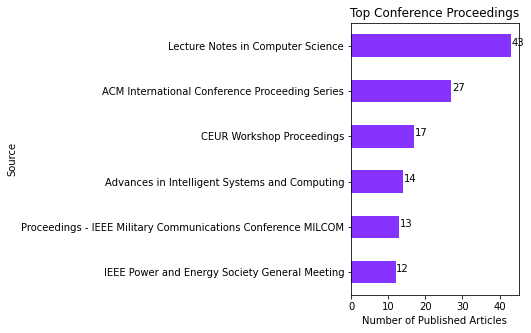

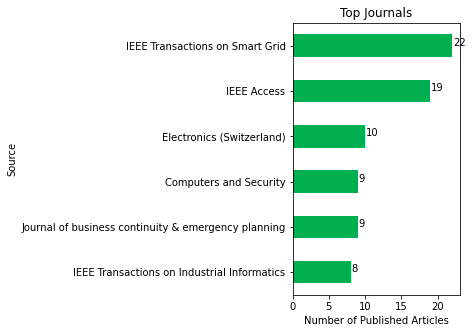

In [131]:

## figure 3
fig, ax = plt.subplots(figsize=(3,5))
# plt.figure(figsize=(8,6))
pd.Series(conf_proc).value_counts().sort_values(ascending=True)[-6:].plot(kind='barh',color=  "#8633FF")#, bins=10)
#relevant_artcls['Cited by'].plot(kind='hist', bins=5,color='blue')
plt.xlabel('Number of Published Articles')
plt.ylabel('Source')
plt.title('Top Conference Proceedings')
plt.xticks(rotation=0)
#plt.xticks(np.arange(min(relevant_artcls['Year']), max(relevant_artcls['Year'])+1, 1.0))
#for i,j in relevant_artcls['Year'].value_counts().sort_index().items():
#    ax.annotate(str(j), (i, j))
for p in ax.patches:
    ax.annotate(str(p.get_width()), ((p.get_width() * 1.005)+0.05, (p.get_y() +p.get_height()/2)))
plt.show()

## figure 3
fig, ax = plt.subplots(figsize=(3,5))
# plt.figure(figsize=(8,6))
pd.Series(journals).value_counts().sort_values(ascending=True)[-6:].plot(kind='barh',color=  "#00B050")#, bins=10)
#relevant_artcls['Cited by'].plot(kind='hist', bins=5,color='blue')
plt.xlabel('Number of Published Articles')
plt.ylabel('Source')
plt.title('Top Journals')
plt.xticks(rotation=0)
#plt.xticks(np.arange(min(relevant_artcls['Year']), max(relevant_artcls['Year'])+1, 1.0))
#for i,j in relevant_artcls['Year'].value_counts().sort_index().items():
#    ax.annotate(str(j), (i, j))
for p in ax.patches:
    ax.annotate(str(p.get_width()), ((p.get_width() * 1.005)+0.05, (p.get_y() +p.get_height()/2)))
plt.show()



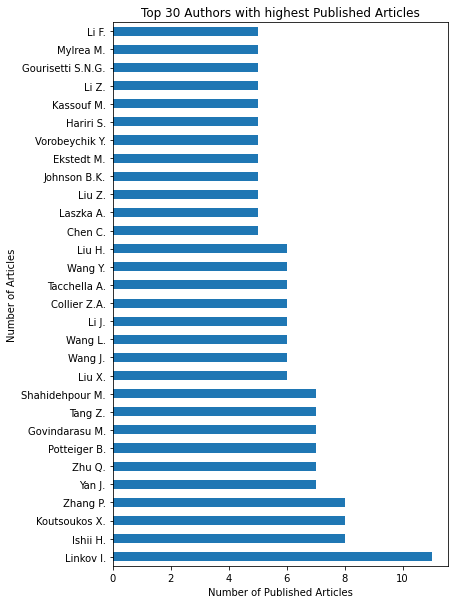

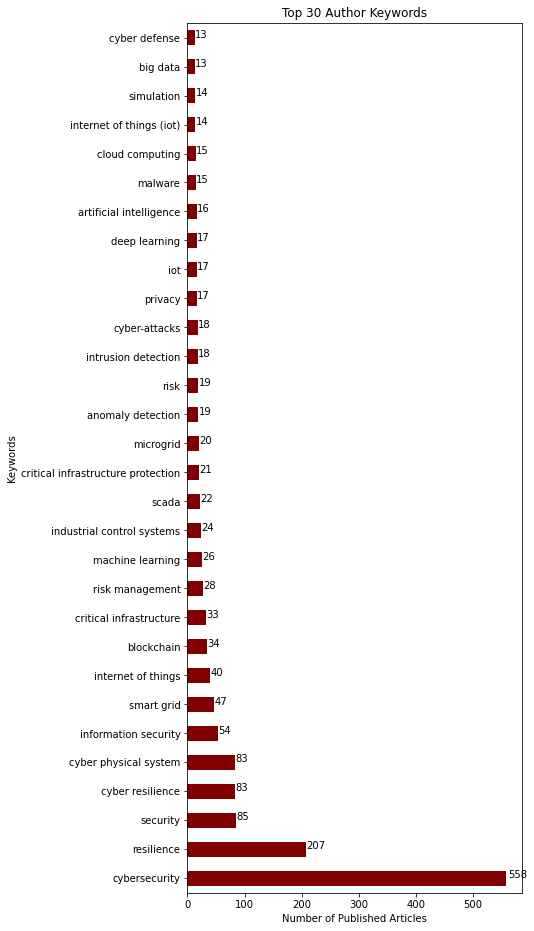

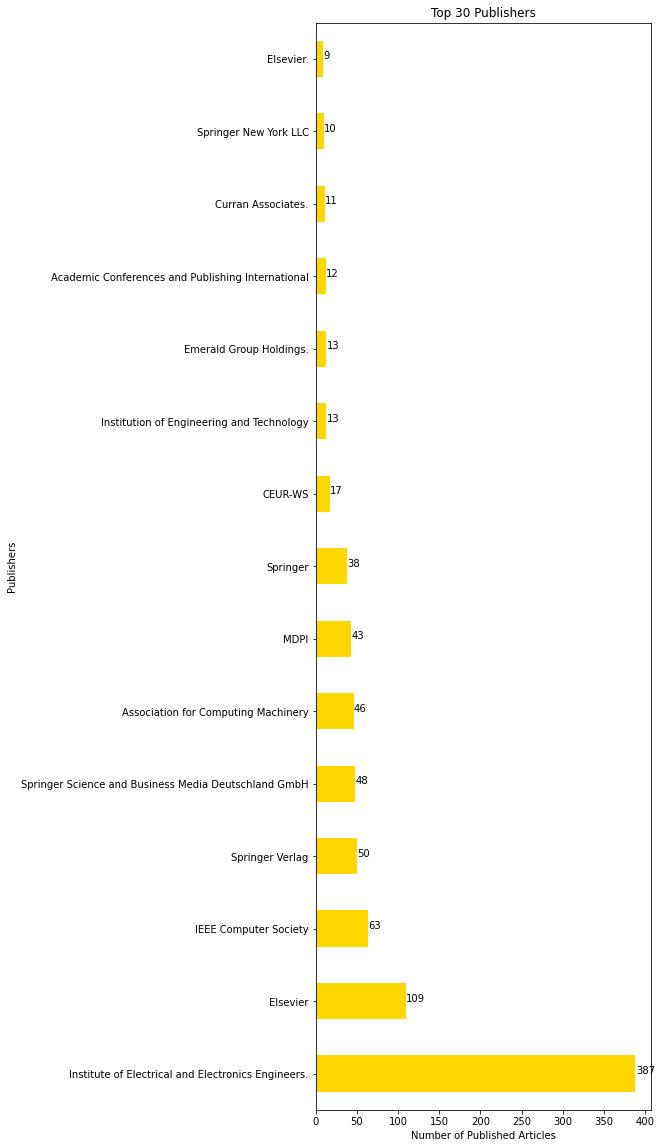

In [132]:
## figure 2
fig, ax = plt.subplots(figsize=(6,10))
# plt.figure(figsize=(8,6))
pd.Series(authors).value_counts().sort_values(ascending=False)[:30].plot(kind='barh')#, bins=10)
#relevant_artcls['Cited by'].plot(kind='hist', bins=5,color='blue')
plt.xlabel('Number of Published Articles')
plt.ylabel('Number of Articles')
plt.title('Top 30 Authors with highest Published Articles')
plt.xticks(rotation=0)
#plt.xticks(np.arange(min(relevant_artcls['Year']), max(relevant_artcls['Year'])+1, 1.0))
#for i,j in relevant_artcls['Year'].value_counts().sort_index().items():
#    ax.annotate(str(j), (i, j))
plt.show()

## figure 3
fig, ax = plt.subplots(figsize=(6,16))
# plt.figure(figsize=(8,6))
pd.Series(author_keywords).value_counts().sort_values(ascending=False)[:30].plot(kind='barh',color='maroon')#, bins=10)
#relevant_artcls['Cited by'].plot(kind='hist', bins=5,color='blue')
plt.xlabel('Number of Published Articles')
plt.ylabel('Keywords')
plt.title('Top 30 Author Keywords')
plt.xticks(rotation=0)
#plt.xticks(np.arange(min(relevant_artcls['Year']), max(relevant_artcls['Year'])+1, 1.0))
#for i,j in relevant_artcls['Year'].value_counts().sort_index().items():
#    ax.annotate(str(j), (i, j))
for p in ax.patches:
    ax.annotate(str(p.get_width()), ((p.get_width() * 1.005)+0.05, (p.get_y() +p.get_height()/2)))
plt.show()









## figure 3
fig, ax = plt.subplots(figsize=(6,20))
# plt.figure(figsize=(8,6))
pd.Series(publishers).value_counts().sort_values(ascending=False)[:15].plot(kind='barh',color='gold')#, bins=10)
#relevant_artcls['Cited by'].plot(kind='hist', bins=5,color='blue')
plt.xlabel('Number of Published Articles')
plt.ylabel('Publishers')
plt.title('Top 30 Publishers')
plt.xticks(rotation=0)
#plt.xticks(np.arange(min(relevant_artcls['Year']), max(relevant_artcls['Year'])+1, 1.0))
#for i,j in relevant_artcls['Year'].value_counts().sort_index().items():
#    ax.annotate(str(j), (i, j))
for p in ax.patches:
    ax.annotate(str(p.get_width()), ((p.get_width() * 1.005)+0.05, (p.get_y() +p.get_height()/2)))
plt.show()

In [133]:
pd.Series(authors).to_csv('07-30 Authors.txt')

In [134]:

with open('readme.txt', 'w', encoding='utf-8') as f:
    f.write(str(relevant_artcls['Full text without references'].values))